<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/CNN_with_scalp_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

In [0]:
subj_15 = datafetch.fetch_subject(15)

In [3]:
subj_15.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [4]:
subj_15['train_data_class1'].shape

(25, 7200, 63)

In [0]:
from plotters import scalp_plotter

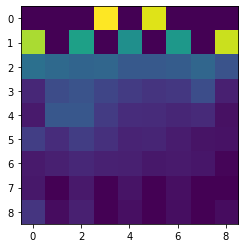

In [6]:
mat = scalp_plotter(subj_15['train_data_class1'][23],12)
plt.imshow(mat)

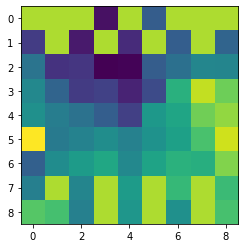

In [7]:
mat = scalp_plotter(subj_15['test_data'][43], 1025)
# You should pass the whole channels with all data
# the secend input of the function shows the time in which you 
# want to see the scalp map
plt.imshow(mat)

# Data load

In [0]:
global subj_list 
global selector
subj_list = [0,0,0,0,0,0]

In [0]:
def update_subjlist(sector):

  if sector ==1:
    subj_1 = datafetch.fetch_subject(1)
    subj_2 = datafetch.fetch_subject(2)
    subj_3 = datafetch.fetch_subject(3)
    subj_4 = datafetch.fetch_subject(4)
    subj_5 = datafetch.fetch_subject(5)
    return np.array([subj_1, subj_2, subj_3, subj_4, subj_5, 1])


  if sector ==2:
    subj_6 = datafetch.fetch_subject(6)
    subj_7 = datafetch.fetch_subject(7)
    subj_8 = datafetch.fetch_subject(8)
    subj_9 = datafetch.fetch_subject(9)
    subj_10 = datafetch.fetch_subject(10)

    return np.array([0,0,0,0,0] + [subj_6, subj_7, subj_8, subj_9, subj_10, 2])


  if sector ==3:
    subj_11 = datafetch.fetch_subject(11)
    subj_12 = datafetch.fetch_subject(12)
    subj_13 = datafetch.fetch_subject(13)
    subj_14 = datafetch.fetch_subject(14)
    subj_15 = datafetch.fetch_subject(15)

    return np.array([0,0,0,0,0] + [0,0,0,0,0] + [subj_11, subj_12, subj_13, subj_14, subj_15, 3])

In [0]:
def selector_desing(sector, classes=[1,4], trail=[0,24]):
  selector = []
  for i in range((sector-1)*5+1, sector*5+1):
    for j in range(classes[0],classes[1]+1):
      for k in range(0,trail[1]+1):
        selector.append((i,j,k))
  selector = np.array(selector)
  np.random.shuffle(selector)

  return selector

In [0]:
def select_data(select):
  '''
  it selects the data according the the selector.
  for exmaple if the seclevto os equal to (3,4,1) the
  data of subject number 1, which belongs to the class number 4, and its 1 trail 
  will be selected. which is a 7200 data point with 63 channels
  '''
  global subj_list

  return subj_list[select[0]-1]['train_data_class{}'.format(select[1])][select[2]]

In [0]:
def item_to_scalp_pictures(item):

  global selector
  global subj_list
  
  '''
  function will get item (the index of the patient) and will return the hilbert 
  images that each channel of eeg will be different channels of the retured image

  This fuction will also return the label. for example the label 1 indicates that
  the patient belongs to the class number 1
  '''

  Mat = []
  Label = []
  #label = selector[item][1]
  for i in range(7200):
    mat  = scalp_plotter(select_data(selector[item]), i)
    Label.append(selector[item][1])
    Mat.append(mat)

  return Mat, Label

## Load Data with 7200 Channels 

In [0]:
def item_to_scalp_pictures(item):

  global selector
  global subj_list
  
  '''
  function will get item (the index of the patient) and will return the hilbert 
  images that each channel of eeg will be different channels of the retured image

  This fuction will also return the label. for example the label 1 indicates that
  the patient belongs to the class number 1
  '''
  mat = scalp_plotter(select_data(selector[item]), 0)
  mat = np.expand_dims(mat, axis=2)
  mats = mat
  label = selector[item][1]
  for i in range(1,7200):
    mat = scalp_plotter(select_data(selector[item]), i)
    mat = np.expand_dims(mat, axis=2)
    mats = np.concatenate((mats, mat), axis=2)

  return mats, label

In [0]:
def load_image_batch(n=[0, 2],sector=1):
  global subj_list
  global selector

  labels = []

  Data = []
  if sector != subj_list[-1]:
    subj_list = update_subjlist(sector)
    selector = selector_desing(sector)

  data, label = item_to_scalp_pictures(n[0])
  Data.append(data)
  labels.append(label)
  for i in range(n[0]+1, n[1]):
    data, label  = item_to_scalp_pictures(i)
    labels.append(label)
    Data.append(data)

  '''
  Label = []
  pre_data = []

  for i in Data:
    pre_data+=i

  #for j in labels:
    #Label += j

  #labels = Label
  Data = pre_data
   '''


  return np.array(Data), np.array(labels)


In [0]:
#data , label = load_image_batch(n=[0,10], sector=1)

In [0]:
#data.shape, label.shape

In [0]:
fig = plt.figure(figsize=(14,6))
for i in range(96):
  ax = fig.add_subplot(6,16,i+1)
  ax.imshow(data[1,:,:,i])
  ax.axis('off')

So ...


So now you can load the bathces of the data, in which with each batch you can choose different subjects from different sectors.

# The Model

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D( 2000, 1, padding ='same', activation='relu', input_shape = [9,9,7200]))


#model.add(keras.layers.Conv2D( 1500, 1, padding ='same', activation='relu') )
model.add(keras.layers.Conv2D( 1000, 1, padding ='same', activation='relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D( 750, 1, padding ='same', activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D( 500, 2, padding ='same', activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D( 256, 1, padding ='same', activation='relu'))
model.add(keras.layers.Conv2D( 64, 1, padding ='same', activation='relu'))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 9, 9, 2000)        14402000  
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 9, 1000)        2001000   
_________________________________________________________________
dropout_12 (Dropout)         (None, 9, 9, 1000)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 750)         750750    
_________________________________________________________________
dropout_13 (Dropout)         (None, 9, 9, 750)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 500)         1500500   
_________________________________________________________________
dropout_14 (Dropout)         (None, 9, 9, 500)        

In [0]:
opt = keras.optimizers.SGD(lr=0.004)
model.compile(optimizer=opt,
              loss = ['sparse_categorical_crossentropy'],
              metrics = ['accuracy'])

In [0]:
Sectors = [1,2,3]
intervals = [[0*i,250*(i+1)] for i in range(2)]
for epoch in range(3):
  for sec in Sectors:
    for interval in intervals:
      data, label = load_image_batch(interval, sec)
      model.fit(data, label-1, epochs=60)
      print('############################')
      print('############################')
      print('sector:{}    and    interval:{}    and    epoch:{}'.format(sec, interval, epoch))
      print('############################')
      print('############################')


Train on 250 samples
Epoch 1/60
250/250 [==============================] - 1s 6ms/sample - loss: 8.0093 - acc: 0.2440
Epoch 2/60
250/250 [==============================] - 1s 4ms/sample - loss: 2.1267 - acc: 0.2720
Epoch 3/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.6469 - acc: 0.3080
Epoch 4/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.7372 - acc: 0.2280
Epoch 5/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.5622 - acc: 0.2520
Epoch 6/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.5100 - acc: 0.2760
Epoch 7/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.5798 - acc: 0.2400
Epoch 8/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.5729 - acc: 0.2560
Epoch 9/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.4963 - acc: 0.2920
Epoch 10/60
250/250 [==============================] - 1s 4ms/sample - loss: 1.4786 - acc: 0.2640
Epoch 11